Predict sales prices and practice feature engineering, RFs, and gradient boosting

# Step 1 : Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score , RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix , r2_score ,roc_auc_score
import pickle
import warnings
warnings.filterwarnings('ignore')

# Step 2 : Uploading the datasets

In [2]:
training_df=pd.read_csv('/content/train.csv')
testing_df=pd.read_csv('/content/test.csv')
print(f"Training data shape : {training_df.shape}")
print(f"Test data shape : {testing_df.shape}")

Training data shape : (1460, 81)
Test data shape : (1459, 80)


In [3]:
print(f"The shape of training data is : {training_df.shape}")

The shape of training data is : (1460, 81)


In [4]:
training_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
training_df['GarageYrBlt']=training_df['GarageYrBlt'].fillna(0).astype(int)
training_df['LotFrontage']=training_df['LotFrontage'].fillna(0).astype(int)
training_df['MasVnrArea'] = training_df['MasVnrArea'].fillna(0).astype(int)

In [7]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   int64 
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          91 non-null     object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [8]:
for col in training_df.columns:
  if training_df[col].dtype != np.int64 :
    print(col,training_df[col].unique())
    print("*"*20)

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
********************
Street ['Pave' 'Grvl']
********************
Alley [nan 'Grvl' 'Pave']
********************
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
********************
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
********************
Utilities ['AllPub' 'NoSeWa']
********************
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
********************
LandSlope ['Gtl' 'Mod' 'Sev']
********************
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
********************
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
********************
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
********************
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
********************
HouseStyle

In [9]:
training_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


**Nan Values need to be handeled rightly for different type of columns.For object features Nan values should be replaced with mode of the data and for int values it should be mean**

In [10]:
for col in training_df.columns:
    if training_df[col].dtype == 'object':
        training_df[col] = training_df[col].fillna(training_df[col].mode()[0])
    else:
        training_df[col] = training_df[col].fillna(training_df[col].mean())

In [11]:
training_df.drop(columns=['Id'],inplace=True)
print(training_df.shape)

(1460, 80)


In [12]:
## Our Target Column
training_df['SalePrice'].value_counts()

,count
SalePrice,
140000,20
135000,17
145000,14
155000,14
190000,13
...,...
223000,1
257000,1
282922,1


# Step 3 : Exploratory Data analysis

Univariate Analysis of Numerical Columns

In [13]:
training_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
sns.set_theme(style='darkgrid')

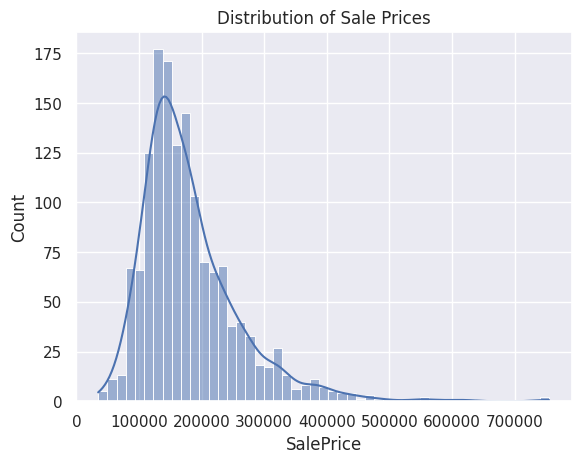

In [15]:
sns.histplot(training_df['SalePrice'],kde=True)
plt.title("Distribution of Sale Prices")
plt.show()

**Distribution of Sale Price is skewed towards right.It has outliers greater than the upper_bound=Q3+(InterQuartileRange)*1.5**


*   Our dataset has categorical and numerical features apart from object columns
*   So we need to do an analysis of them separately



In [16]:
categorical_features=['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','Fireplaces','TotRmsAbvGrd','KitchenAbvGr','BedroomAbvGr','GarageCars','MoSold','YrSold']
numerical_features=[]
for col in training_df.columns:
  if training_df[col].dtype == np.int64 and col not in categorical_features:
    numerical_features.append(col)

print(categorical_features)
print(numerical_features)

['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Fireplaces', 'TotRmsAbvGrd', 'KitchenAbvGr', 'BedroomAbvGr', 'GarageCars', 'MoSold', 'YrSold']
['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


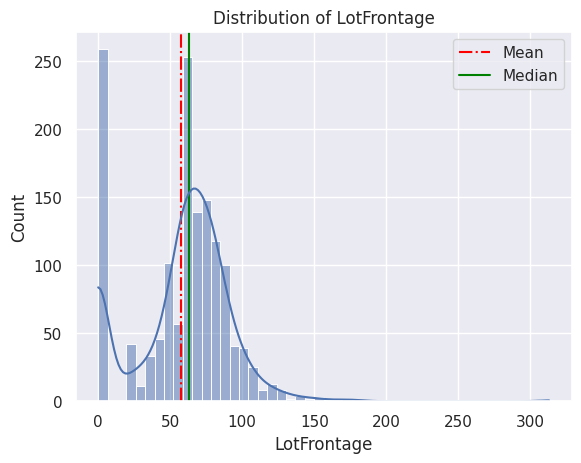

In [17]:
LotFrontage_Mean=training_df['LotFrontage'].mean()
LotFrontage_Median=training_df['LotFrontage'].median()
plt.axvline(LotFrontage_Mean,color='red',ls='-.',label='Mean')
plt.axvline(LotFrontage_Median,color='green',ls='-',label='Median')
sns.histplot(training_df['LotFrontage'],kde=True)
plt.title("Distribution of LotFrontage")
plt.legend()
plt.show()

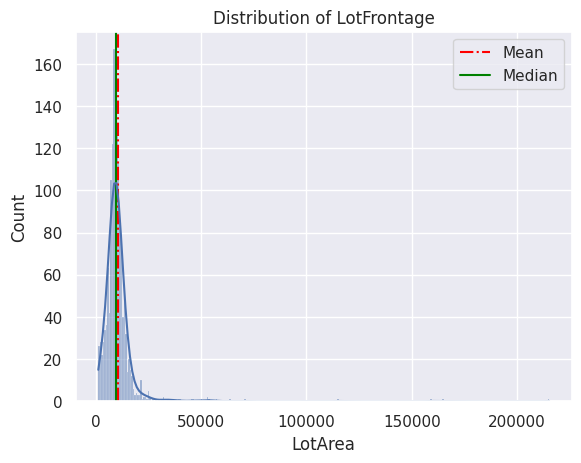

In [18]:
LotArea_Mean=training_df['LotArea'].mean()
LotArea_Median=training_df['LotArea'].median()
plt.axvline(LotArea_Mean,color='red',ls='-.',label='Mean')
plt.axvline(LotArea_Median,color='green',ls='-',label='Median')
sns.histplot(training_df['LotArea'],kde=True)
plt.title("Distribution of LotFrontage")
plt.legend()
plt.show()

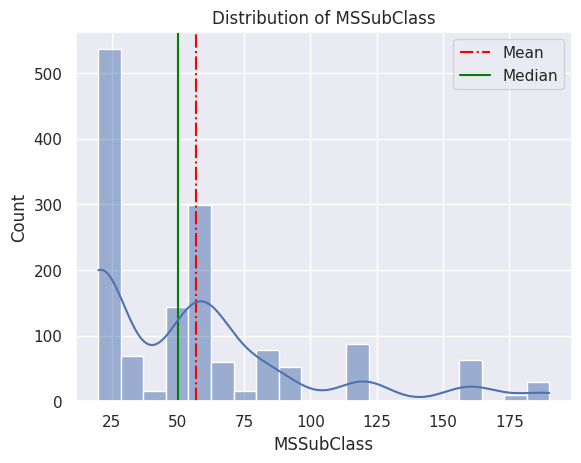

In [19]:
MSSubClass_Mean=training_df['MSSubClass'].mean()
MSSubClass_Median=training_df['MSSubClass'].median()
plt.axvline(MSSubClass_Mean,color='red',ls='-.',label='Mean')
plt.axvline(MSSubClass_Median,color='green',ls='-',label='Median')
sns.histplot(training_df['MSSubClass'],kde=True)
plt.title("Distribution of MSSubClass")
plt.legend()
plt.show()

Box Plots to identify outliers in the data

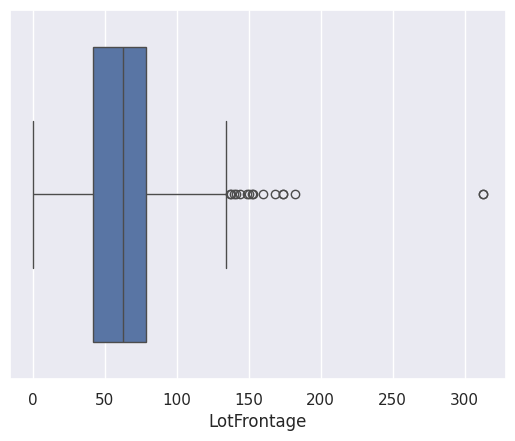

In [20]:
sns.boxplot(training_df['LotFrontage'],orient='h')
plt.show()

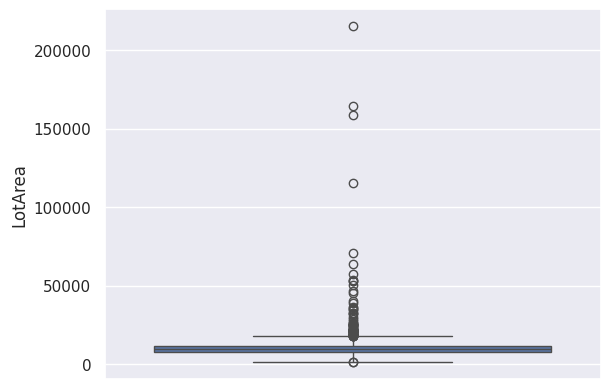

In [21]:
sns.boxplot(training_df['LotArea'],orient='v')
plt.show()

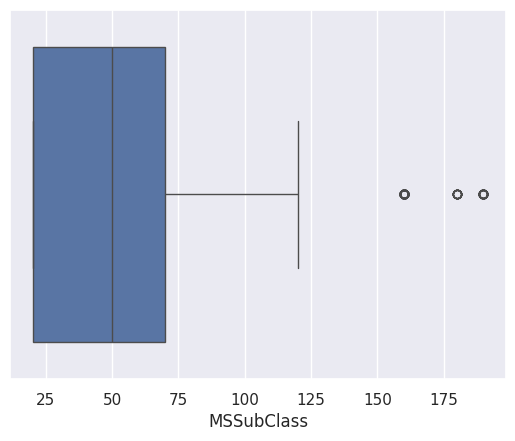

In [22]:
sns.boxplot(training_df['MSSubClass'],orient='h')
plt.show()

In [23]:
#Counting the outliers
for col in numerical_features:
  q1=training_df[col].quantile(0.25)
  q3=training_df[col].quantile(0.75)
  IQR=q3-q1
  lower_bound=q1-1.5*IQR
  upper_bound=q3+1.5*IQR
  outliers=training_df[(training_df[col]<lower_bound)|(training_df[col]>upper_bound)]
  print(f"Number of outliers in {col} is {len(outliers)}")

Number of outliers in MSSubClass is 103
Number of outliers in LotFrontage is 16
Number of outliers in LotArea is 69
Number of outliers in YearBuilt is 7
Number of outliers in YearRemodAdd is 0
Number of outliers in MasVnrArea is 98
Number of outliers in BsmtFinSF1 is 7
Number of outliers in BsmtFinSF2 is 167
Number of outliers in BsmtUnfSF is 29
Number of outliers in TotalBsmtSF is 61
Number of outliers in 1stFlrSF is 20
Number of outliers in 2ndFlrSF is 2
Number of outliers in LowQualFinSF is 26
Number of outliers in GrLivArea is 31
Number of outliers in GarageYrBlt is 81
Number of outliers in GarageArea is 21
Number of outliers in WoodDeckSF is 32
Number of outliers in OpenPorchSF is 77
Number of outliers in EnclosedPorch is 208
Number of outliers in 3SsnPorch is 24
Number of outliers in ScreenPorch is 116
Number of outliers in PoolArea is 7
Number of outliers in MiscVal is 52
Number of outliers in SalePrice is 61


Univariate Analysis of Categorical Columns

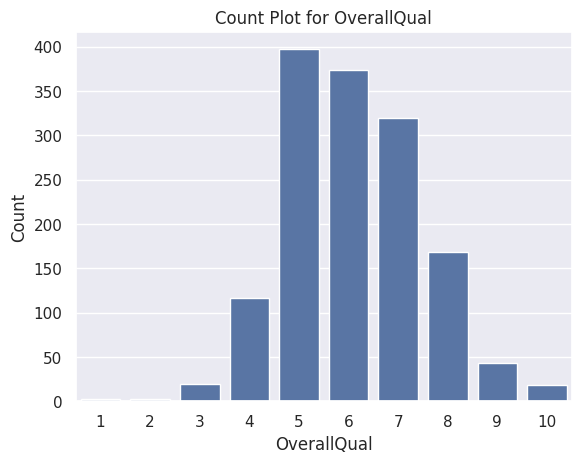

******************************************************************************************
------------------------------------------------------------------------------------------


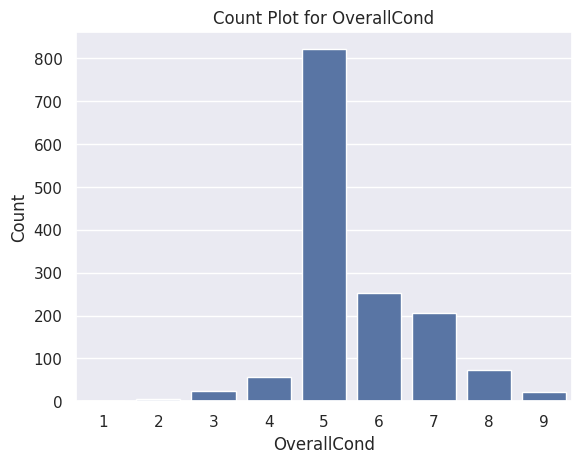

******************************************************************************************
------------------------------------------------------------------------------------------


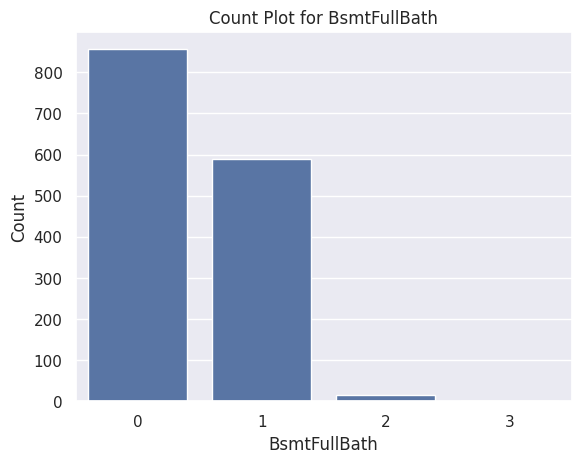

******************************************************************************************
------------------------------------------------------------------------------------------


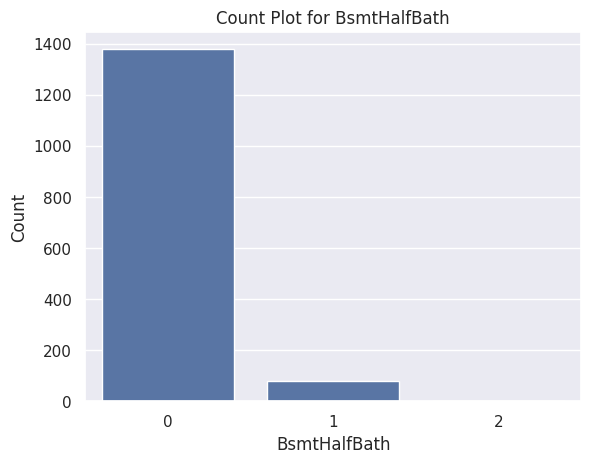

******************************************************************************************
------------------------------------------------------------------------------------------


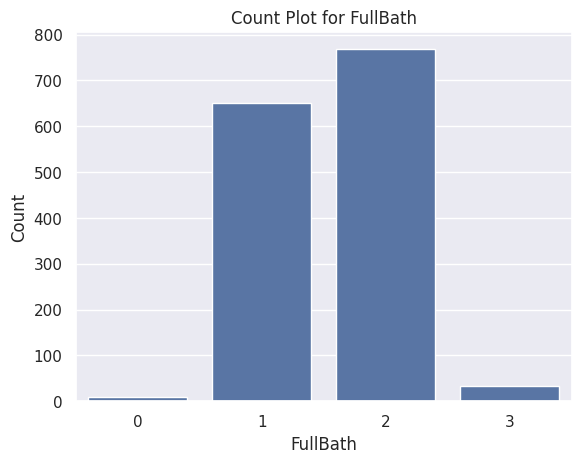

******************************************************************************************
------------------------------------------------------------------------------------------


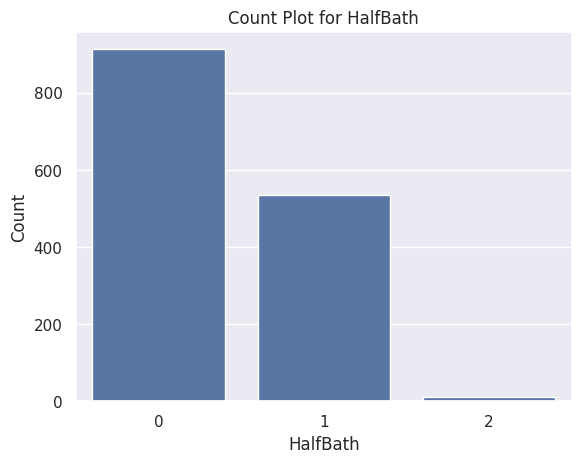

******************************************************************************************
------------------------------------------------------------------------------------------


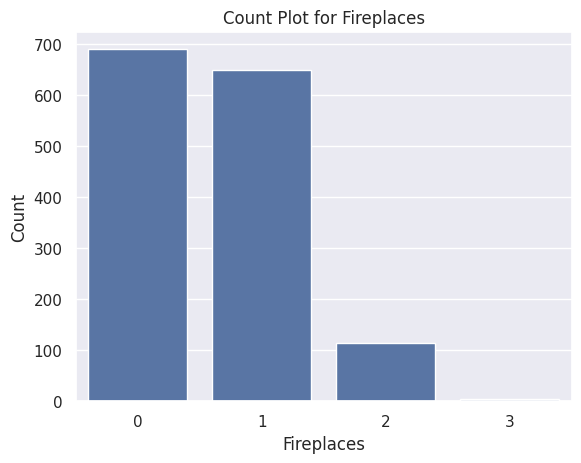

******************************************************************************************
------------------------------------------------------------------------------------------


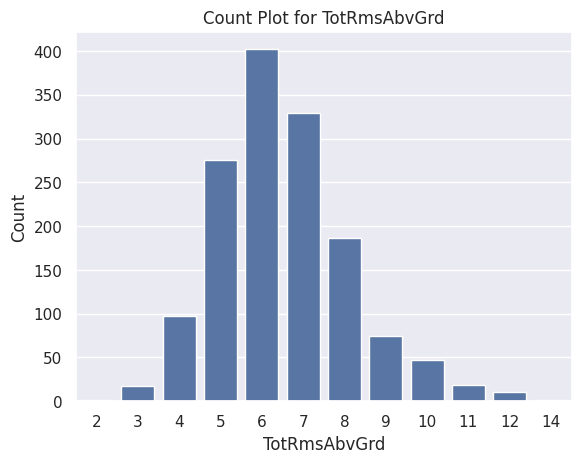

******************************************************************************************
------------------------------------------------------------------------------------------


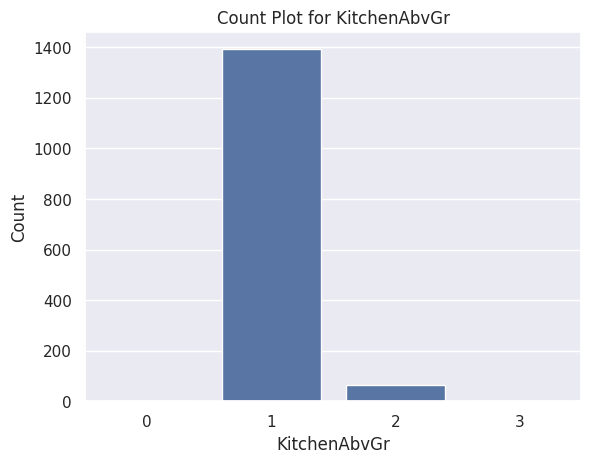

******************************************************************************************
------------------------------------------------------------------------------------------


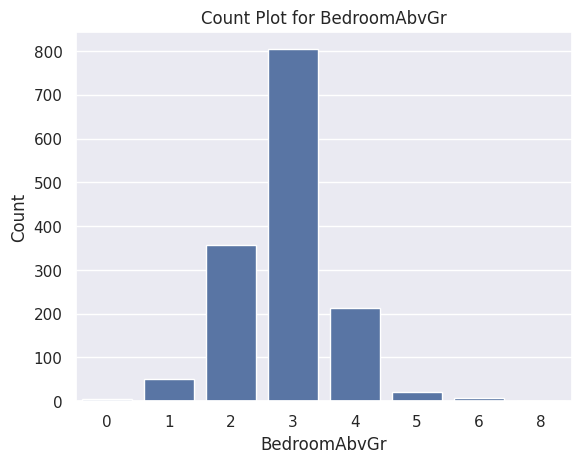

******************************************************************************************
------------------------------------------------------------------------------------------


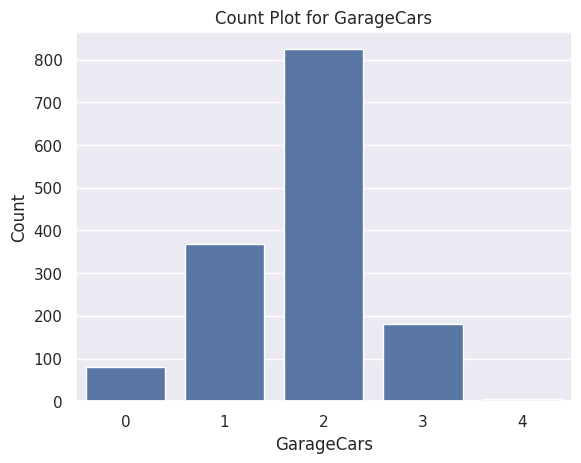

******************************************************************************************
------------------------------------------------------------------------------------------


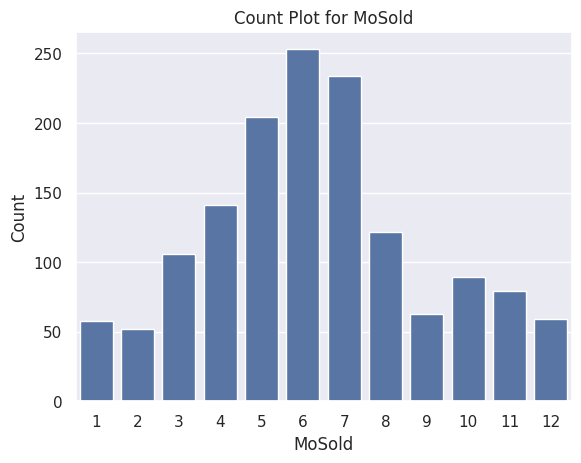

******************************************************************************************
------------------------------------------------------------------------------------------


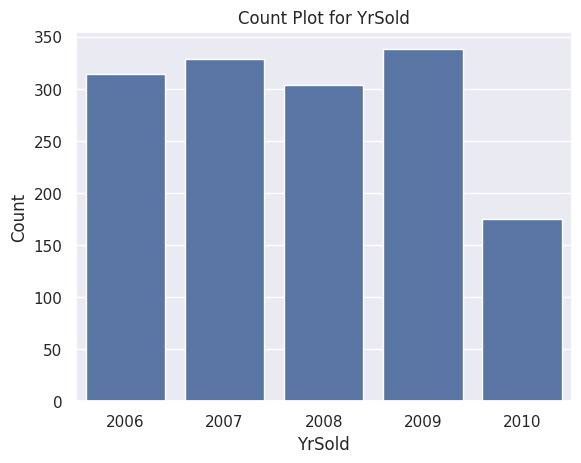

******************************************************************************************
------------------------------------------------------------------------------------------


In [24]:
for col in categorical_features:
  sns.countplot(x=training_df[col])
  plt.title(f"Count Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()
  print("*"*90)
  print("-"*90)

In [25]:
for col in categorical_features:
  print(f"For the column : {col} there are {training_df[col].isna().sum()}")

For the column : OverallQual there are 0
For the column : OverallCond there are 0
For the column : BsmtFullBath there are 0
For the column : BsmtHalfBath there are 0
For the column : FullBath there are 0
For the column : HalfBath there are 0
For the column : Fireplaces there are 0
For the column : TotRmsAbvGrd there are 0
For the column : KitchenAbvGr there are 0
For the column : BedroomAbvGr there are 0
For the column : GarageCars there are 0
For the column : MoSold there are 0
For the column : YrSold there are 0


In [26]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1460 non-null   int64 
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   Alley          1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

In [27]:
object_col=training_df.select_dtypes(include=['object'])
print(object_col.columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [28]:
encoders={}
for col in object_col.columns:
  label_encoder=LabelEncoder()
  training_df[col]=label_encoder.fit_transform(training_df[col])
  encoders[col]=label_encoder

In [29]:
print(encoders)

{'MSZoning': LabelEncoder(), 'Street': LabelEncoder(), 'Alley': LabelEncoder(), 'LotShape': LabelEncoder(), 'LandContour': LabelEncoder(), 'Utilities': LabelEncoder(), 'LotConfig': LabelEncoder(), 'LandSlope': LabelEncoder(), 'Neighborhood': LabelEncoder(), 'Condition1': LabelEncoder(), 'Condition2': LabelEncoder(), 'BldgType': LabelEncoder(), 'HouseStyle': LabelEncoder(), 'RoofStyle': LabelEncoder(), 'RoofMatl': LabelEncoder(), 'Exterior1st': LabelEncoder(), 'Exterior2nd': LabelEncoder(), 'MasVnrType': LabelEncoder(), 'ExterQual': LabelEncoder(), 'ExterCond': LabelEncoder(), 'Foundation': LabelEncoder(), 'BsmtQual': LabelEncoder(), 'BsmtCond': LabelEncoder(), 'BsmtExposure': LabelEncoder(), 'BsmtFinType1': LabelEncoder(), 'BsmtFinType2': LabelEncoder(), 'Heating': LabelEncoder(), 'HeatingQC': LabelEncoder(), 'CentralAir': LabelEncoder(), 'Electrical': LabelEncoder(), 'KitchenQual': LabelEncoder(), 'Functional': LabelEncoder(), 'FireplaceQu': LabelEncoder(), 'GarageType': LabelEncoder(

In [30]:
print(encoders)
with open("encoders.pkl","wb") as f:
  pickle.dump(encoders,f)

{'MSZoning': LabelEncoder(), 'Street': LabelEncoder(), 'Alley': LabelEncoder(), 'LotShape': LabelEncoder(), 'LandContour': LabelEncoder(), 'Utilities': LabelEncoder(), 'LotConfig': LabelEncoder(), 'LandSlope': LabelEncoder(), 'Neighborhood': LabelEncoder(), 'Condition1': LabelEncoder(), 'Condition2': LabelEncoder(), 'BldgType': LabelEncoder(), 'HouseStyle': LabelEncoder(), 'RoofStyle': LabelEncoder(), 'RoofMatl': LabelEncoder(), 'Exterior1st': LabelEncoder(), 'Exterior2nd': LabelEncoder(), 'MasVnrType': LabelEncoder(), 'ExterQual': LabelEncoder(), 'ExterCond': LabelEncoder(), 'Foundation': LabelEncoder(), 'BsmtQual': LabelEncoder(), 'BsmtCond': LabelEncoder(), 'BsmtExposure': LabelEncoder(), 'BsmtFinType1': LabelEncoder(), 'BsmtFinType2': LabelEncoder(), 'Heating': LabelEncoder(), 'HeatingQC': LabelEncoder(), 'CentralAir': LabelEncoder(), 'Electrical': LabelEncoder(), 'KitchenQual': LabelEncoder(), 'Functional': LabelEncoder(), 'FireplaceQu': LabelEncoder(), 'GarageType': LabelEncoder(

Bivariate Analysis

In [31]:
training_df.shape

(1460, 80)

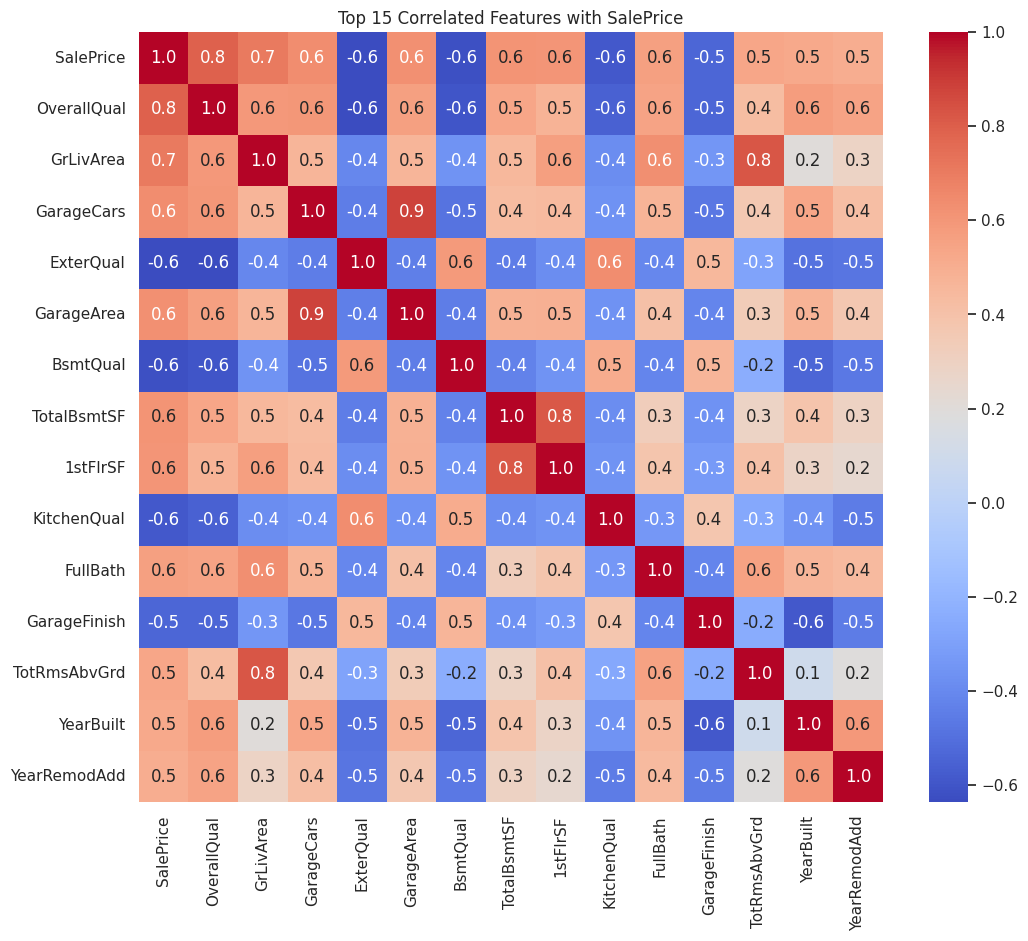

In [32]:
corr_matrix = training_df.corr()

# Finding top 15 correlated features with target
top_corr_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(15).index
top_corr_matrix = training_df[top_corr_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title("Top 15 Correlated Features with SalePrice")
plt.show()




*   Features aren't very highly correlated with SalePrice
*   Also the tree based models we are using can handle the data with fairly correlated features nicely but sometimes it can be probelmatic for finding feature importances.



# Step 4 : Data Preprocessing
Handling Outliers : Replacing Outliers with Median

In [33]:
def replace_outlier_with_median(df,column):
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  IQR=q3-q1
  lower_bound=q1-1.5*IQR
  upper_bound=q3+1.5*IQR
  median=df[column].median()
  df[column]=df[column].apply(lambda x:median if x<lower_bound or x> upper_bound else x)
  return df


In [34]:
numerical_features.remove('MasVnrArea')
for cols in numerical_features:
  replace_outlier_with_median(training_df,cols)
print("Processing of outliers done")
for col in numerical_features:
  q1=training_df[col].quantile(0.25)
  q3=training_df[col].quantile(0.75)
  IQR=q3-q1
  lower_bound=q1-1.5*IQR
  upper_bound=q3+1.5*IQR
  outliers=training_df[(training_df[col]<lower_bound)|(training_df[col]>upper_bound)]
  print(f"Number of outliers in {col} is {len(outliers)}")


Processing of outliers done
Number of outliers in MSSubClass is 0
Number of outliers in LotFrontage is 2
Number of outliers in LotArea is 54
Number of outliers in YearBuilt is 0
Number of outliers in YearRemodAdd is 0
Number of outliers in BsmtFinSF1 is 1
Number of outliers in BsmtFinSF2 is 0
Number of outliers in BsmtUnfSF is 13
Number of outliers in TotalBsmtSF is 14
Number of outliers in 1stFlrSF is 6
Number of outliers in 2ndFlrSF is 0
Number of outliers in LowQualFinSF is 0
Number of outliers in GrLivArea is 10
Number of outliers in GarageYrBlt is 1
Number of outliers in GarageArea is 0
Number of outliers in WoodDeckSF is 8
Number of outliers in OpenPorchSF is 48
Number of outliers in EnclosedPorch is 0
Number of outliers in 3SsnPorch is 0
Number of outliers in ScreenPorch is 0
Number of outliers in PoolArea is 0
Number of outliers in MiscVal is 0
Number of outliers in SalePrice is 48


Number of Outliers is significantly reduced

Train Test Split

In [35]:
X=training_df.drop(columns='SalePrice')
Y=training_df['SalePrice']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_train.shape)
print("*"*50)
print(X_test.shape)

(1168, 79)
**************************************************
(292, 79)


In [36]:
Y_train.value_counts()

,count
SalePrice,
163000.0,52
140000.0,15
135000.0,13
110000.0,12
190000.0,12
...,...
142953.0,1
156932.0,1
98600.0,1


In [37]:
Y_test.value_counts()

,count
SalePrice,
163000.0,13
115000.0,6
140000.0,5
135000.0,4
145000.0,4
...,...
297000.0,1
185750.0,1
89471.0,1


# Step 5 : Model Training

In [38]:
models={"Decision Tree":DecisionTreeRegressor(random_state=42),"Random Forest":RandomForestRegressor(random_state=42),"XGBoostReg":XGBRegressor(random_state=42)}
cv_scores={}
for model_name,model in models.items():
  print(f"Training {model_name} to predict the sale price")
  scores=cross_val_score(model,X_train,Y_train,cv=5,scoring='r2')
  cv_scores[model_name]=scores
  print(f"{model_name} has cross validation score of : {np.mean(scores):.2f}")
  print("*"*60)

Training Decision Tree to predict the sale price
Decision Tree has cross validation score of : 0.53
************************************************************
Training Random Forest to predict the sale price
Random Forest has cross validation score of : 0.74
************************************************************
Training XGBoostReg to predict the sale price
XGBoostReg has cross validation score of : 0.73
************************************************************


# Step 6 : Model Selection and Hyperparameter Tuning

In [39]:
param_grid_dt={
    "criterion":['absolute_error', 'poisson', 'friedman_mse', 'squared_error'],
    "max_depth":[None,5,10,15],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}
param_grid_rf={
    "n_estimators":[50,100,300,500],
    "max_depth":[3,5,8,10],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "bootstrap":[True,False]
}
param_grid_xgb={
    "n_estimators":[50,100,200,500],
    "max_depth":[1,3,5,7,10],
    "learning_rate":[0.01,0.1,0.05,0.2],
    "subsample":[0.5,0.7,1.0],
    "colsample_bytree":[0.5,0.7,1.0]
}

In [40]:
random_search_dt=RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=42),param_distributions=param_grid_dt,
                                    n_iter=10,cv=5,scoring='r2',random_state=42)
random_search_dt.fit(X_train,Y_train)
print("Best parameters for Decision Tree:", random_search_dt.best_params_)
print("Best R² score from cross-validation:", random_search_dt.best_score_)

Best parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'squared_error'}
Best R² score from cross-validation: 0.6269839951402114


In [41]:
random_search_rf=RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),param_distributions=param_grid_rf,
                                    n_iter=10,cv=5,scoring='r2',random_state=42,n_jobs=-1,verbose=1)
random_search_rf.fit(X_train,Y_train)
print("Best parameters for Random Forest Regressor:", random_search_rf.best_params_)
print("Best R² score from cross-validation:", random_search_rf.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest Regressor: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 8, 'bootstrap': True}
Best R² score from cross-validation: 0.7391393360913775


In [42]:
random_search_xgb=RandomizedSearchCV(estimator=XGBRegressor(random_state=42),param_distributions=param_grid_xgb,
                                    n_iter=10,cv=5,scoring='r2',random_state=42,n_jobs=-1,verbose=1)
random_search_xgb.fit(X_train,Y_train)
print("Best parameters for XGBRegressor:", random_search_xgb.best_params_)
print("Best R² score from cross-validation:", random_search_xgb.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for XGBRegressor: {'subsample': 0.5, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Best R² score from cross-validation: 0.7553847453595273


In [43]:
best_model = None
best_score = 0

# Create a dictionary to store the best estimators and their scores
best_results = {
    random_search_dt.best_score_: random_search_dt.best_estimator_,
    random_search_rf.best_score_: random_search_rf.best_estimator_,
    random_search_xgb.best_score_: random_search_xgb.best_estimator_
}

# Find the maximum score and corresponding model
best_score = max(best_results.keys())
best_model = best_results[best_score]


print("Best model:", best_model)
print("Best R² score:", best_score)

Best model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
Best R² score: 0.7553847453595273


In [44]:
best_model.feature_importances_

array([0.00225065, 0.01190686, 0.00451065, 0.0064042 , 0.        ,
       0.0021372 , 0.01029561, 0.00795734, 0.        , 0.00218131,
       0.00510221, 0.00809034, 0.00426978, 0.02453985, 0.00634668,
       0.0051609 , 0.11952364, 0.00939555, 0.01300087, 0.01415166,
       0.01020272, 0.00909194, 0.00693846, 0.00855785, 0.01164469,
       0.00766945, 0.08948135, 0.00320717, 0.01980329, 0.00887792,
       0.01332376, 0.00817858, 0.00819756, 0.01125222, 0.00424754,
       0.        , 0.0058694 , 0.02736116, 0.00267818, 0.00315413,
       0.03445246, 0.00102497, 0.01640407, 0.0197665 , 0.        ,
       0.04691155, 0.00714327, 0.00414064, 0.00723448, 0.01119056,
       0.00816907, 0.00268544, 0.02172372, 0.0090662 , 0.00665729,
       0.04280895, 0.0117592 , 0.02643431, 0.00833177, 0.06049775,
       0.0444272 , 0.01739658, 0.01025452, 0.00015082, 0.01111372,
       0.0100122 , 0.01166396, 0.        , 0.        , 0.        ,
       0.        , 0.00629034, 0.00225731, 0.        , 0.     

In [45]:
from sklearn.ensemble import StackingRegressor

stack = StackingRegressor(
    estimators=[
        ('dt', DecisionTreeRegressor(min_samples_split= 2, min_samples_leaf= 1, max_depth= 5, criterion= 'squared_error',random_state=42)),
        ('rf', RandomForestRegressor(n_estimators= 100, min_samples_split= 5, min_samples_leaf= 1, max_depth= 8, bootstrap= True,random_state=42)),
        ('xgb', XGBRegressor(subsample= 0.7, n_estimators= 100, max_depth= 7, learning_rate= 0.1, colsample_bytree= 0.7,random_state=42))
    ],
    final_estimator=XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42),
    passthrough=True,
    n_jobs=-1
)
print(f"Training Stacked Regressor to predict the sale price")
scores=cross_val_score(stack,X_train,Y_train,cv=5,scoring='r2')
cv_scores['stacked']=scores
print(f"Stacked Regression has cross validation score of : {np.mean(scores):.2f}")
print("*"*60)

Training Stacked Regressor to predict the sale price
Stacked Regression has cross validation score of : 0.73
************************************************************


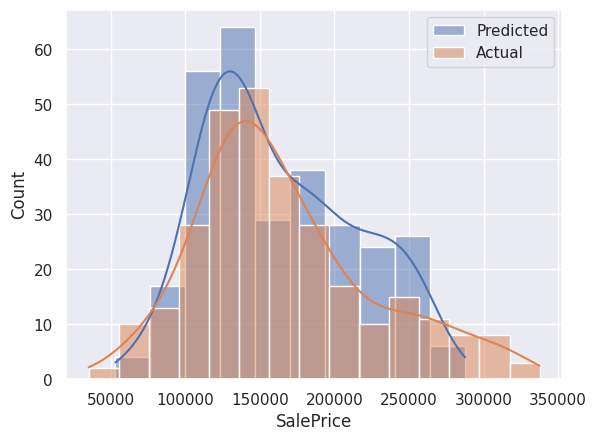

Cross Val Score : [0.79744433 0.80828292 0.6630319  0.759334   0.68582559]
R2 Score is : 0.7873008645123939


In [46]:
stack.fit(X_train,Y_train)
y_pred=stack.predict(X_test)
sns.histplot(y_pred,kde=True,label='Predicted')
sns.histplot(Y_test,kde=True,label='Actual')
plt.legend()
plt.show()
print(f"Cross Val Score : {cross_val_score(stack,X_test,Y_test,cv=5,scoring='r2')}")
print(f"R2 Score is : {r2_score(Y_test,y_pred)}")

# Final Step : Submission
Final Prediction on test.csv

In [47]:
ids=testing_df.pop('Id')
print("Testing df shape : ", testing_df.shape)


Testing df shape :  (1459, 79)


In [48]:
testing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [49]:
for col in testing_df.columns:
  if testing_df[col].dtype != np.int64 and testing_df[col].dtype!=np.float64 :
    print(col,testing_df[col].unique())
    print("*"*20)

MSZoning ['RH' 'RL' 'RM' 'FV' 'C (all)' nan]
********************
Street ['Pave' 'Grvl']
********************
Alley [nan 'Pave' 'Grvl']
********************
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
********************
LandContour ['Lvl' 'HLS' 'Bnk' 'Low']
********************
Utilities ['AllPub' nan]
********************
LotConfig ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
********************
LandSlope ['Gtl' 'Mod' 'Sev']
********************
Neighborhood ['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor' 'Blueste' 'IDOTRR'
 'Mitchel' 'Timber' 'MeadowV' 'Veenker']
********************
Condition1 ['Feedr' 'Norm' 'PosN' 'RRNe' 'Artery' 'RRNn' 'PosA' 'RRAn' 'RRAe']
********************
Condition2 ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery']
********************
BldgType ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
********************
HouseStyle ['1Story' '2Story' 'S

In [50]:
for col in testing_df.columns:
    if testing_df[col].dtype == 'object':
        testing_df[col] = testing_df[col].fillna(testing_df[col].mode()[0])
    else:
        testing_df[col] = testing_df[col].fillna(testing_df[col].mean())

In [51]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [52]:
testing_df['MasVnrArea']=testing_df['MasVnrArea'].fillna(0).astype(int)
testing_df['LotFrontage']=testing_df['LotFrontage'].fillna(0).astype(int)
testing_df['GarageYrBlt']=testing_df['GarageYrBlt'].fillna(0).astype(int)

In [53]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   int64  
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [54]:
## use encoders dictionary to transform
for col in testing_df.columns:
  if col in encoders.keys():
    testing_df[col]=encoders[col].transform(testing_df[col])

In [55]:
stack_pred=stack.predict(testing_df)

In [56]:
output=pd.DataFrame({'Id':ids,'SalePrice':stack_pred})
print(output)
output.to_csv('submission.csv',index=False)

        Id      SalePrice
0     1461  120861.015625
1     1462  156987.703125
2     1463  186551.312500
3     1464  188487.671875
4     1465  204937.000000
...    ...            ...
1454  2915   91126.406250
1455  2916   91335.523438
1456  2917  175022.812500
1457  2918  116500.460938
1458  2919  242214.000000

[1459 rows x 2 columns]
